In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv(r"C:\Users\karth\Downloads\titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.shape

(891, 12)

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data=data.drop('PassengerId',axis=1)

In [8]:
data=data.drop('Name',axis=1)

In [9]:
data=data.drop('Ticket',axis=1)

In [10]:
data['Cabin'].fillna("Unknown", inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Age'][data['Age'].isnull()==True]=data[data['Age'].isnull()==False].median()[0]

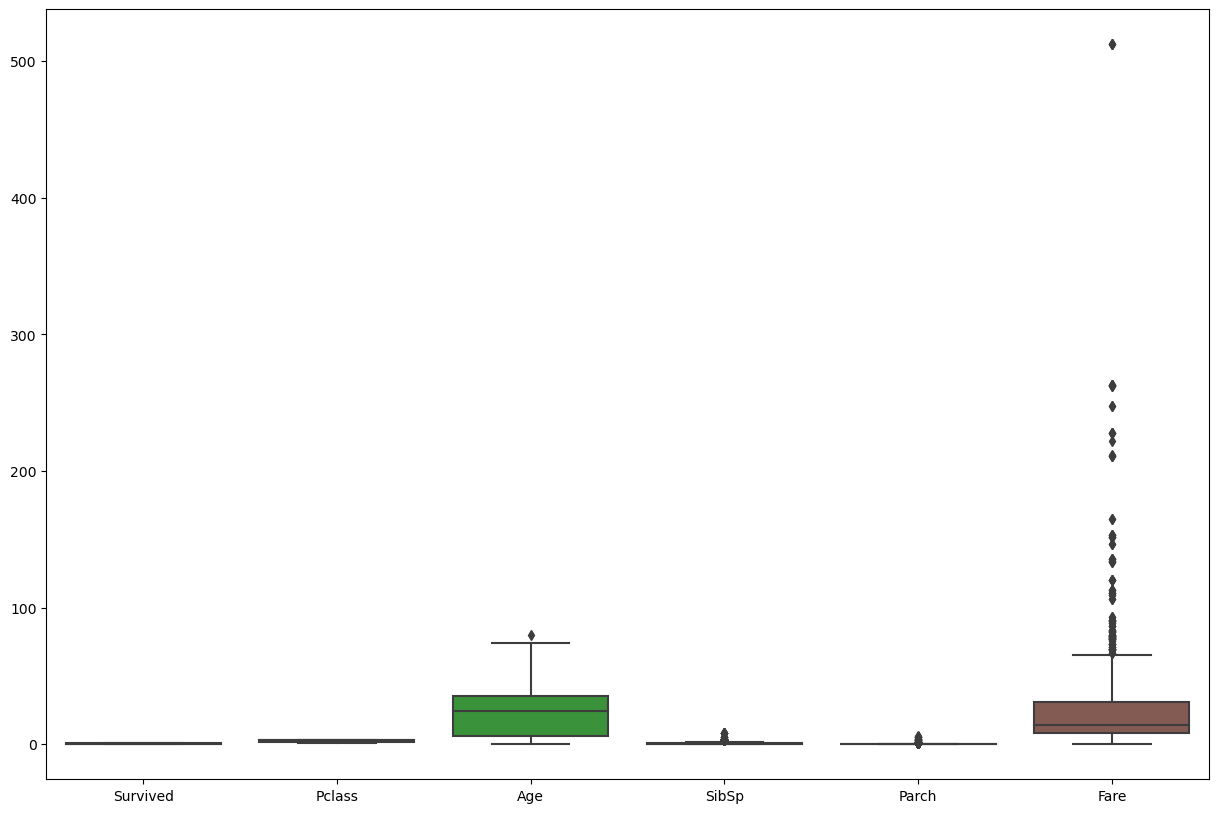

In [11]:
#checking for outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.show()

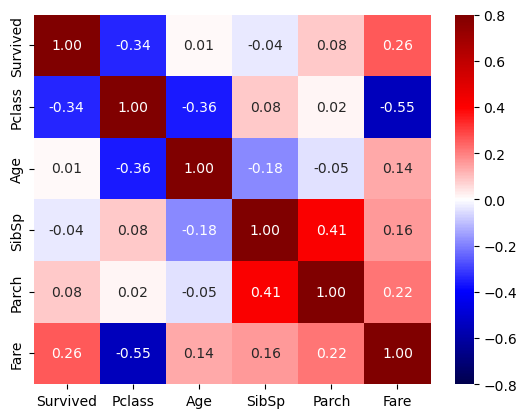

In [12]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, fmt='.2f', annot=True, vmin= -0.8, vmax= 0.8, cmap='seismic')
plt.show()

In [13]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [14]:
data.shape

(891, 9)

In [15]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [16]:
data=pd.get_dummies(data)

In [17]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


scaler = StandardScaler()
scaler.fit(data)
df = scaler.transform(data)

df = pd.DataFrame(df,columns=data.columns)

df.head()

df.columns

In [18]:
x=data.drop('Survived',axis=1)
y=data.Survived

In [19]:
#split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

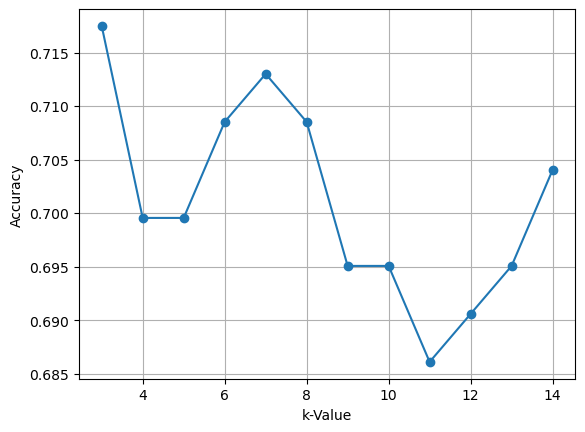

In [21]:
k_matrix = []
neighbors = np.arange(3, 15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    model_knn = knn.fit(x_train, y_train)
    y_pred_knn = model_knn.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    k_matrix.append(acc)

plt.plot(neighbors, k_matrix,'o-')
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=7,metric='hamming')
knn_model = knn.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

print(confusion_matrix(y_test, y_pred_knn)," - confusion_matrix")
print("accuracy_score - ",accuracy_score(y_test, y_pred_knn))

[[116  18]
 [ 24  65]]  - confusion_matrix
accuracy_score -  0.8116591928251121


In [23]:
from sklearn.svm import SVC

In [24]:
svm_clf = SVC(kernel='linear')
svm_modell = svm_clf.fit(x_train, y_train)
y_pred_svml = svm_modell.predict(x_test)


print(confusion_matrix(y_test, y_pred_svml)," - confusion_matrix")
print("accuracy_score - ",accuracy_score(y_test, y_pred_svml))

[[112  22]
 [ 25  64]]  - confusion_matrix
accuracy_score -  0.7892376681614349


In [25]:
#Kfold Cross validation
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
# kfold for kNN
cv_result_knn=cross_val_score(knn_model,x,y,cv=kfold_validator)
cv_result_knn

array([0.75555556, 0.80898876, 0.7752809 , 0.80898876, 0.84269663,
       0.82022472, 0.80898876, 0.75280899, 0.84269663, 0.79775281])

In [28]:
np.mean(cv_result_knn)

0.8013982521847691

In [29]:
#kfold for SVM
cv_result_svm=cross_val_score(svm_modell,x,y,cv=kfold_validator)
cv_result_svm

array([0.82222222, 0.80898876, 0.75280899, 0.84269663, 0.78651685,
       0.80898876, 0.75280899, 0.73033708, 0.84269663, 0.76404494])

In [30]:
np.mean(cv_result_svm)

0.791210986267166

In [31]:
#Stratified Kfold validation
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [32]:
#Stratified Kfold validation for kNN
skcv_result_knn=cross_val_score(knn_model,x,y,cv=skfold_validator)
skcv_result_knn

array([0.77777778, 0.75280899, 0.7752809 , 0.79775281, 0.87640449,
       0.78651685, 0.79775281, 0.7752809 , 0.82022472, 0.82022472])

In [33]:
np.mean(skcv_result_knn)

0.7980024968789013

In [34]:
#Stratified Kfold validation for SVM
skcv_result_svm=cross_val_score(svm_modell,x,y,cv=skfold_validator)
skcv_result_svm

array([0.82222222, 0.79775281, 0.76404494, 0.84269663, 0.82022472,
       0.78651685, 0.7752809 , 0.75280899, 0.82022472, 0.76404494])

In [35]:
np.mean(skcv_result_svm)

0.79458177278402